# Creation of UMAP to identify batch effects

Import Packages and Data

In [3]:
#import packages
import pandas as pd
import umap 
import numpy as np
import matplotlib.pyplot as plt

# Pia Kentschke
ATAC_seq_path = "/Users/piakentschke/Documents/Uni/Data Analysis/ImmGenATAC18_AllOCRsInfo.csv"
ATAC_scores_path = "/Users/piakentschke/Documents/Uni/Data Analysis/ATAC_scores.csv"
RNA_seq_path = "/Users/piakentschke/Documents/Uni/Data Analysis/RNA-seq_data.csv"
Transcription_exons_path = "/Users/piakentschke/Documents/Uni/Data Analysis/refFlat.txt"
Cell_population_qc_path = "/Users/piakentschke/Documents/Uni/Data Analysis/mmc1.xlsx"
Voluntary_path = "/Users/piakentschke/Documents/Uni/Data Analysis/ImmGenATAC18_AllTFmotifsInOCRs.txt"


ATAC_scores = pd.read_csv(ATAC_scores_path, sep=",", keep_default_na=False)
RNA_seq = pd.read_csv(RNA_seq_path)
ATAC_seq = pd.read_csv(ATAC_seq_path, sep=",", keep_default_na=False)

#drop peaks with infinite -log10 p values
ATAC_seq = ATAC_seq[ATAC_seq['_-log10_bestPvalue'] != np.inf]

#define threshold (p = 0.05)
threshold_pval = 1.3

# Filter ATAC-seq peaks based on logp value threshold 
ATAC_cleaned = ATAC_seq[ATAC_seq["_-log10_bestPvalue"] >= threshold_pval]


# Create data subsets
col_ATAC_seq_ab_act_gd_T = ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM','preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th',
    'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th',
    'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr',
    'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp',
    'T8.IEL.LCMV.d7.SI', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp',
    'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp',
    'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d',
    'Tgd.g2+d17.24a+.Th', 'Tgd.g2+d17.LN', 'Tgd.g2+d1.24a+.Th',
    'Tgd.g2+d1.LN', 'Tgd.g1.1+d1.24a+.Th', 'Tgd.g1.1+d1.LN', 'Tgd.Sp']

col_ATAC_seq_ab_act_T = ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM','preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th',
    'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th',
    'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr',
    'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp',
    'T8.IEL.LCMV.d7.SI', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp',
    'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp',
    'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d']

col_ATAC_seq_gd_T = ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM','Tgd.g2+d17.24a+.Th', 'Tgd.g2+d17.LN', 'Tgd.g2+d1.24a+.Th',
    'Tgd.g2+d1.LN', 'Tgd.g1.1+d1.24a+.Th', 'Tgd.g1.1+d1.LN', 'Tgd.Sp']

col_ATAC_seq_ab_T = ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM','preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th',
    'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th',
    'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr',
    'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp']

ATAC_seq_ab_act_gd_T = ATAC_cleaned[col_ATAC_seq_ab_act_gd_T]
ATAC_seq_gd_T = ATAC_seq[col_ATAC_seq_gd_T]
ATAC_seq_ab_act_T = ATAC_seq[col_ATAC_seq_ab_act_T]
ATAC_seq_ab_T = ATAC_seq[col_ATAC_seq_ab_T]

/opt/miniconda3/envs/dataanalysisenv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Create column collections by cell lineage, cell type and organ

Cell lineages

In [ ]:
# columns sorted by cell lineage
Stem_prog_cols = ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM', 'MPP3.48+.BM']
Tab_cols = ['preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th','T.4.Nve.Sp', 
        'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp','T8.TN.P14.Sp', 'T8.IEL.LCMV.d7.SI',
        'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp','T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp'] 

Tact_cols = ['NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d']

Tgd_cols = ['Tgd.g2+d17.24a+.Th', 'Tgd.g2+d17.LN', 'Tgd.g2+d1.24a+.Th', 'Tgd.g2+d1.LN', 'Tgd.g1.1+d1.24a+.Th', 'Tgd.g1.1+d1.LN', 'Tgd.Sp']

B_cols = ['proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'preB.FrD.BM', 'B.FrE.BM',
       'B1b.PC', 'B.T1.Sp', 'B.T2.Sp', 'B.T3.Sp', 'B.Sp', 'B.Fem.Sp',
       'B.MZ.Sp', 'B.Fo.Sp', 'B.mem.Sp', 'B.GC.CB.Sp', 'B.GC.CC.Sp', 'B.PB.Sp',
       'B.PC.Sp', 'B.PC.BM']

ILC_cols = ['NK.27+11b-.BM', 'NK.27+11b+.BM', 'NK.27-11b+.BM', 'NK.27+11b-.Sp','NK.27+11b+.Sp', 'NK.27-11b+.Sp', 'ILC2.SI', 'ILC3.NKp46-CCR6-.SI',
       'ILC3.NKp46+.SI', 'ILC3.CCR6+.SI']

my_cols = ['GN.BM', 'GN.Sp','GN.Thio.PC', 'MF.pIC.Alv.Lu', 'MF.226+II+480lo.PC', 'MF.ICAM+480hi.PC', 'MF.RP.Sp', 'MF.LP.SI', 'MF.Alv.Lu', 
        'MF.microglia.CNS', 'MF.PC', 'MF.Fem.PC']

mono_cols = ['Mo.6C+II-.Bl', 'Mo.6C-II-.Bl']

dc_cols = ['DC.4+.Sp', 'DC.8+.Sp', 'DC.pDC.Sp', 'DC.103+11b+.SI', 'DC.103+11b-.SI']

stroma_cols = ['FRC.SLN','IAP.SLN', 'BEC.SLN', 'LEC.SLN', 'Ep.MEChi.Th']

cell_lineages = {
    'Stem_prog': Stem_prog_cols,
    'Tab': Tab_cols,
    'Tact': Tact_cols,
    'Tgd': Tgd_cols,
    'B': B_cols,
    'ILC': ILC_cols,
    'Myeloid': my_cols,
    'Mono': mono_cols,
    'DC': dc_cols,
    'Stroma': stroma_cols
}

# Flatten the mapping from cell lineages to columns
column_to_lineage = {}
for lineage, cols in cell_lineages.items():
    for col in cols:
        column_to_lineage[col] = lineage

# Create a list of lineage labels
sample_columns = ATAC_scores.columns[1:] 

# Build a label list in the correct order
lineage_labels = [column_to_lineage.get(col) for col in sample_columns]
print(lineage_labels)

# transpose the ATAC_scores DataFrame to have samples as rows and peaks as columns
umap_data = ATAC_scores.iloc[:, :].T  

# Apply UMAP
umap_embedding = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean').fit_transform(umap_data.iloc[1:, :])

print(umap_embedding.shape)

# Convert lineage labels to categorical codes for coloring
colors_lineage = pd.Categorical(lineage_labels).codes



['Stem_prog', 'Stem_prog', 'Stem_prog', 'Stem_prog', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'Tab', 'Tab', 'Tab', 'Tab', 'Tab', 'Tab', 'Tab', 'Tab', 'Tab', 'Tab', 'Tab', 'Tab', 'Tab', 'Tab', 'Tab', 'Tab', 'Tab', 'Tab', 'Tab', 'Tab', 'Tab', 'Tab', 'Tact', 'Tact', 'Tact', 'Tgd', 'Tgd', 'Tgd', 'Tgd', 'Tgd', 'Tgd', 'Tgd', 'ILC', 'ILC', 'ILC', 'ILC', 'ILC', 'ILC', 'ILC', 'ILC', 'ILC', 'ILC', 'Stem_prog', 'Myeloid', 'Myeloid', 'Myeloid', 'Mono', 'Mono', 'Myeloid', 'Myeloid', 'Myeloid', 'Myeloid', 'Myeloid', 'Myeloid', 'Myeloid', 'Myeloid', 'Myeloid', 'DC', 'DC', 'DC', 'DC', 'DC', 'Stroma', 'Stroma', 'Stroma', 'Stroma', 'Stroma']
(90, 2)
90


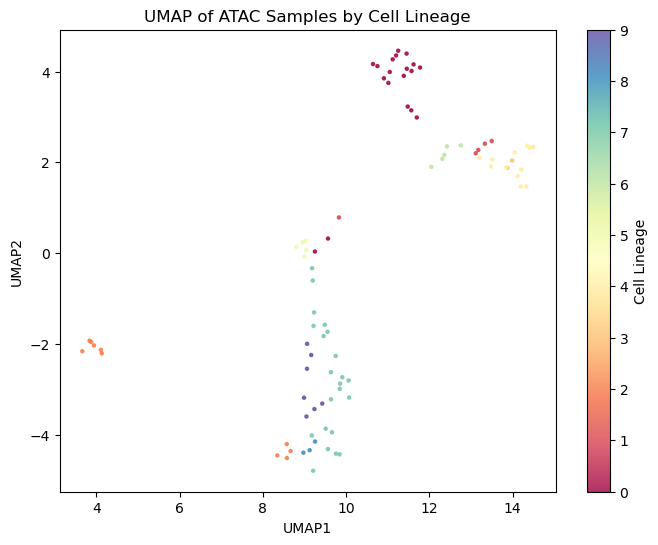

In [ ]:
#initialize UMAP reducer 
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean')

# Apply UMAP
umap_embedding = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean').fit_transform(umap_data.iloc[1:, :])

# Convert lineage labels to categorical codes for coloring
colors = pd.Categorical(lineage_labels).codes

# UMAP plot
plt.figure(figsize=(8, 6))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=colors_lineage, cmap='Spectral', s=5, alpha=0.8)
plt.title('UMAP of ATAC Samples by Cell Lineage')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.colorbar(label='Cell Lineage')
plt.show()

## Create UMAP dimensionality reduction to check for outlier cells


In [ ]:
# columns sorted by organs

bm_cols = ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM', 'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'preB.FrD.BM', 
        'B.FrE.BM', 'NK.27+11b-.BM', 'NK.27+11b+.BM', 'NK.27-11b+.BM', 'MPP3.48+.BM', 'GN.BM']

sp_cols = ['B.T1.Sp', 'B.T2.Sp', 'B.T3.Sp', 'B.Sp', 'B.Fem.Sp',
       'B.MZ.Sp', 'B.Fo.Sp', 'B.mem.Sp', 'B.GC.CB.Sp', 'B.GC.CC.Sp', 'B.PB.Sp',
       'B.PC.Sp', 'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp',
       'T8.IEL.LCMV.d7.SI', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp',
       'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp',
       'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'Tgd.Sp', 'NK.27+11b-.Sp',
       'NK.27+11b+.Sp', 'NK.27-11b+.Sp', 'GN.Sp', 'MF.RP.Sp', 'DC.4+.Sp',
       'DC.8+.Sp', 'DC.pDC.Sp']

thy_cols = ['preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 
        'Tgd.g2+d17.24a+.Th', 'Tgd.g2+d1.24a+.Th', 'Tgd.g1.1+d1.24a+.Th', 'Ep.MEChi.Th']

col_cols = ['Treg.4.FP3+.Nrplo.Co']

small_int_cols = ['DC.103+11b+.SI', 'DC.103+11b-.SI', 'MF.LP.SI', 'ILC2.SI', 'ILC3.NKp46-CCR6-.SI', 'ILC3.NKp46+.SI', 'ILC3.CCR6+.SI',
        'MF.LP.SI', 'DC.103+11b+.SI', 'DC.103+11b-.SI']

sk_dr_LN_cols = ['FRC.SLN', 'IAP.SLN', 'BEC.SLN', 'LEC.SLN']

per_cav_cols = ['B1b.PC', 'GN.Thio.PC', 'MF.226+II+480lo.PC', 'MF.ICAM+480hi.PC', 'MF.PC', 'MF.Fem.PC']

lung_cols = ['MF.Alv.Lu', 'MF.pIC.Alv.Lu']

per_bl_cols = ['Mo.6C+II-.Bl', 'Mo.6C-II-.Bl']

ln_cols = ['Tgd.g2+d17.LN', 'Tgd.g2+d1.LN', 'Tgd.g1.1+d1.LN']

brain_cols = ['MF.microglia.CNS']

organs = {

    'BM': bm_cols,
    'SP': sp_cols,
    'Thy': thy_cols,
    'Col': col_cols,
    'Small_int': small_int_cols,
    'Sk_dr_LN': sk_dr_LN_cols,
    'Per_cav': per_cav_cols,
    'Lung': lung_cols,
    'Per_bl': per_bl_cols,
    'LN': ln_cols,
    'Brain': brain_cols
    }